> ## Naive Bayes
<br/>

### Bayes Theorem

Let E1, E2,…, En be a set of events associated with a sample space S, where all the events E1, E2,…, En have nonzero probability of occurrence and they form a partition of S. Let A be any event associated with S, then according to Bayes theorem,

$$ P(E_{i}\mid A) = \frac{P(E_{i}) \cdot P(A\mid E_{i})}{\sum_{k=1}^{n} P(E_{k}) \cdot P(A\mid E_{k}) } $$ 

for any k = 1, 2, 3, … , n

> Proof

<pre>Probability of A given that B has occured</pre>
$$ P(A \mid B) = \frac{P(A \cap B)}{P(B)}  \; \; \; \; \; \; \; \; \; \;...\; (1)$$
<pre>Probability of A given that B has occured</pre>
$$ P(B \mid A) = \frac{P(A \cap B)}{P(A)}  \; \; \; \; \; \; \; \; \; \;...\; (2)$$

Now using (1) and (2)

$$ P(A \mid B) \cdot P(B) = P(A \cap B) = P(B \mid A) \cdot P(A) $$

$$ P(A \mid B) \cdot P(B) = P(B \mid A) \cdot P(A) $$

>  $$ P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)} $$


Example, 
<br/>

Let's have two machines M<sub>1</sub> and M<sub>2</sub>, that builds Bolts. 
M<sub>1</sub> can built 30 Bolts and M<sub>2</sub> can build 20 Bolts per second respectively. 1% of the total bolts are defective, Also it was given that the chance of building defective bolts for each machine is 50%.

Now,
                    
$$ P(M_{1})  =\  \frac{30}{20+30} =\  \frac{30}{50} =\  0.6 $$
$$ P(M_{2})  =\  \frac{20}{20+30} =\  \frac{20}{50} =\  0.4 $$
$$ P(Defected)  =\  0.01 $$
$$ P(M_{1} \mid Defected)  =\  0.5 $$
$$ P(M_{2} \mid Defected)  =\  0.5 $$

<pre>P(Event A | Event B) means probability of Event A, if Event B is given </pre>

Now, Given a bolt build by M<sub>1</sub>, what is the probability it is defected?

Using Bayes Theorem

$$ P(Defected \mid M_{1}) = \frac{P(M_{1} \mid Defected) \cdot P(Defected)}{P(M_{1} \mid Defected)+P(M_{1} \mid Not\ Defected)} $$

<br/>

$$ P(Defected \mid M_{1}) = \frac{P(M_{1} \mid Defected) \cdot P(Defected)}{P(M_{1})} $$

<br/>

$$ P(Defected \mid M_{1}) = \frac{0.01 * 0.5}{0.4} $$

$$ P(Defected \mid M_{1}) = 0.0125 $$

<br/>

$$ P(Defected \mid M_{2}) = \frac{0.01 * 0.5}{0.6} $$

$$ P(Defected \mid M_{2}) = 0.075 $$

> ## Naive Bayes Classifier

This classifier usages Bayes Theorem to predict the class of new data point

>  $$ P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)} $$

This Classification works in three step

Step 1) Find the probability that new datapoint belongs to class A
Step 2) Find the probability that new datapoint belongs to class B
Step 3) Compare probabilities and predict the class of new data point.

Given a set of datapoints, Red and Green. Find the class of new datapoint (Gray).
<img src="./problem_statement.png">

> **Step 1 : Calculate P(Walks|X)**

<img src="./Step_1.1.png">

**#1 P(Walks) [ Prior Probability ]**
<img src="./Step_1.2.png">

**#2 P(X|Walks) [ Likelihood ]**
> Draw a circle around the new data point, **Observation Circle**

<img src="./Step_1.3.png">

**#3 P(X) [ Marginal Likelihood ]**
<img src="./Step_1.4.png">

**#4 P(Walks|X) [ Posterior Probability ]**
<img src="./Step_1.5.png">

> **Step 2 : Calculate P(Drives|X)**

<img src="./Step_2.png">

> **Step 3 : Compare P(Walks|X) and P(Drives|X)**
<pre>
P(Walks|X) v.s. P(Drives|X)
0.75 v.s. 0.25
0.75 > 0.25
</pre>

> **It means the new datapoint is going to Red Class**

> In the Step 3

$$ P(Walks \mid X) \; \; v.s. \; \; P(Drives \mid X) $$

$$ \frac { P(X \mid Walks) \cdot P(Walks)} {P(X)} \; \; v.s. \; \; \frac { P(X \mid Drives) \cdot P(Drives)} {P(X)} $$

P(X) can be discarded

$$ \frac { P(X \mid Walks) \cdot P(Walks)} { \xcancel{P(X)} } \; \; v.s. \; \; \frac { P(X \mid Drives) \cdot P(Drives)} {\xcancel{P(X)} } $$

> $$ P(X \mid Walks) \cdot P(Walks) \; \; v.s. \; \; P(X \mid Drives) \cdot P(Drives) $$


### Loading and Preprocession Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('../Datasets/Classification/Naive_Bayes_Classification/Social_Network_Ads.csv')
# print(dataset)

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


# # Taking care of Missing values
# from sklearn.impute import SimpleImputer 
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(X[:,:-1])
# X[:,:-1] =  imputer.transform(X[:,:-1])
# imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imputer.fit(X[:,-2:-1])
# X[:,-2:-1] =  imputer.transform(X[:,-2:-1])
# # print(X)

# # Encoding categorial Data [One Hot Encoding]
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encode',OneHotEncoder(),[-1])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))
# # print(X)

# Splitting dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

### Feature Scaling

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# fit using training data
sc.fit(X_train)
# transform training data using the scaler
X_train = sc.transform(X_train)
# transform test data using the same scaler
X_test = sc.transform(X_test)

### Training the Naive Bayes Classification Model using Training Data

In [4]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

### Predicting a test resullt

In [5]:
# predict a single test 
classifier.predict(sc.transform([[30,87000]]))

array([0], dtype=int64)

### Predict Test results

In [6]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),axis=1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


### Making the Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
acs = accuracy_score(y_test,y_pred)
print(acs)
# Confusion Matrix
# [
#     [Correct-0,   Incorrect-1]
#     [Incorrect-0, Correct-0]
# ]

[[65  3]
 [ 7 25]]
0.9


### Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


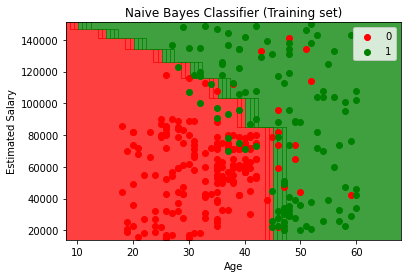

In [8]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 5),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 5))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


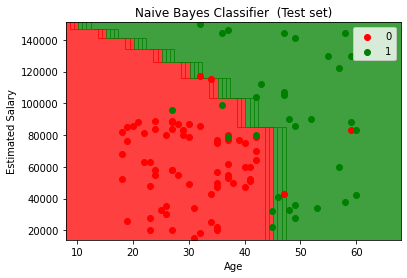

In [9]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 5),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 5))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes Classifier  (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()